# Linear Regression Project

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! 

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

## Importing libraries

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette("dark", 69)

## Let's have a look at the data

In [111]:
df = pd.read_csv("Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [113]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Data Analysis
#### The goal is to find any patterns and insights. Start by looking for correlations between the explanatory variables and predictor variable

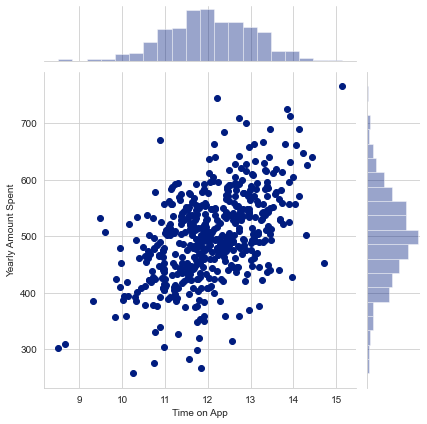

In [114]:
sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data = df)

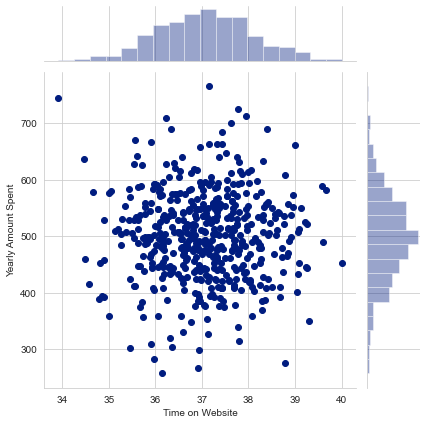

In [115]:
sns.jointplot(x = "Time on Website", y = "Yearly Amount Spent", data = df)

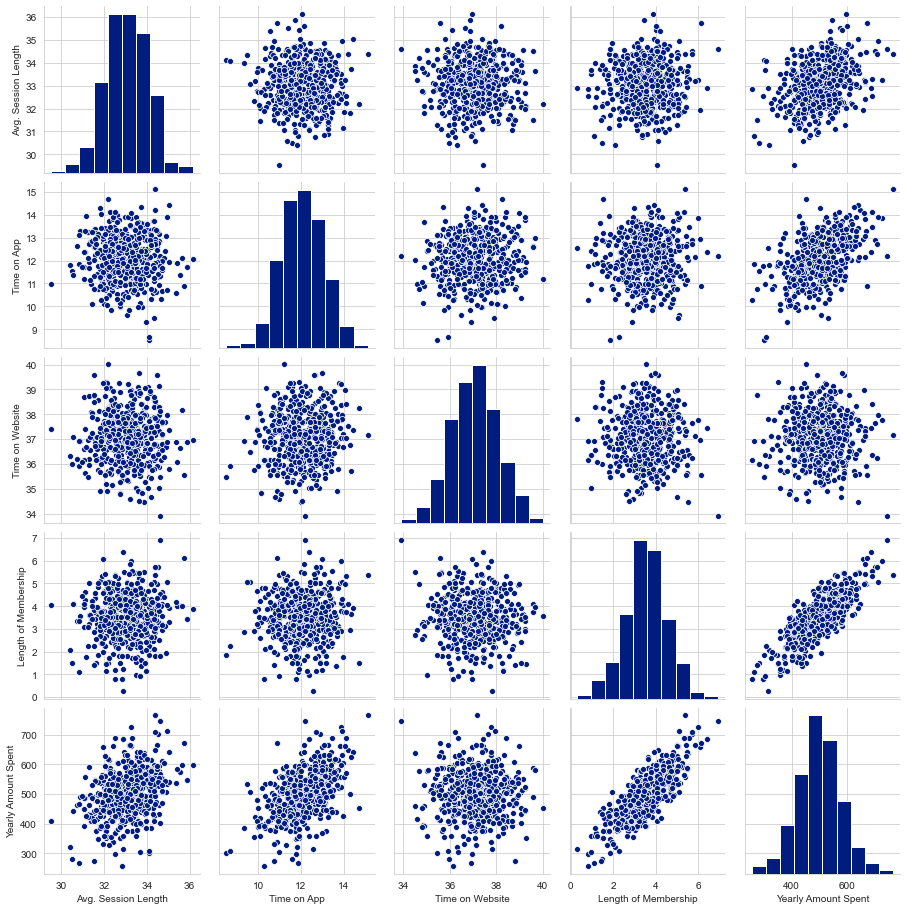

In [116]:
sns.pairplot(df)

In [117]:
#clear corellation between "yarly amount spent" and "length of membership"

## Creating and training a linear prediction model

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [119]:
y = df["Yearly Amount Spent"]
x = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [121]:
model = LinearRegression()

In [122]:
model.fit(x_train, y_train)

LinearRegression()

## Testing the model

In [123]:
predictions = model.predict(x_test)

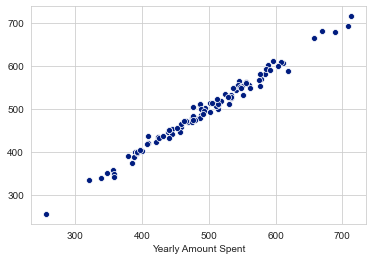

In [124]:
sns.scatterplot(y_test, predictions)

## Model evaluation & conclusion

In [125]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 10.30178260725341


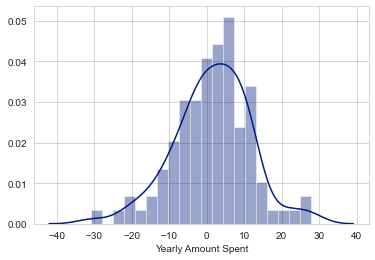

In [126]:
sns.distplot((predictions-y_test), bins = 20)

In [127]:
# the error is normally distributed, which implies that the model is pretty good

In [128]:
# let's look at the exact effect on the prediction variable from the explanatory variables
coefs = pd.DataFrame(model.coef_, x.columns)
coefs.columns = ["coefficients"]
coefs

,coefficients
Avg. Session Length,25.165161
Time on App,38.513041
Time on Website,0.387176
Length of Membership,61.636278


In [129]:
# it seems like the app has more impact on the money spent by the customers; 
# however, the length of memberships and average session length are important variables as well